#### Задача 2
С помощью средств языка Python сгенерируйте граф в модели Боллобаша-Риордана $G_m^n$ при $m=3$ и $n=100000$. Вычислите величины $X(d_1, d_2)$, $$\tilde{X}(d_1,d_2)=\sum\limits_{j_1\geqslant j_2,j_1>d_{\max}, j_2>d_{\min}}X(j_1, j_2),$$ где $d_{\max}=\max\{d_1,d_2\}$, $d_{\min}=\min\{d_1,d_2\}$, и $$\tilde{\rho}(d_1,d_2)=\frac{\tilde{X}(d_1,d_2)}{\tilde{\sharp}(d_1)\tilde{\sharp}(d_2)},$$ 
$${\rho}(d_1,d_2)=\frac{{X}(d_1,d_2)}{{\sharp}(d_1){\sharp}(d_2)},$$ где $\tilde{\sharp}(d)=\sum\limits_{j>d}{\sharp}(d),$ а ${\sharp}(d)$ - число вершин степени $d$.
Постройте в трехмерных $\log$-координатах зависимость ${\rho}(d_1,d_2)$ и $\tilde{\rho}(d_1,d_2)$ от $d_1$, $d_2$.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random
%matplotlib inline
def generateSimpleBollobasRiordanGraph(n):
    G = nx.MultiDiGraph()
    G.add_node(0)
    G.add_edge(0, 0)
    # список всех вершин графа, каждая из них входит в него в количестве, равном её степени
    repeated_nodes = [0, 0]
    while G.number_of_nodes() < n:
        new_node = G.number_of_nodes()
        G.add_node(new_node)
        # для возможности петли
        repeated_nodes.append(new_node)
        # выбираем конец ребра пропорционально степени вершины
        destination = random.choice(repeated_nodes)
        repeated_nodes.append(destination)
        G.add_edge(new_node, destination)
    return G

def generateBollobasRiordanGraph(n, m):
    G1mn = generateSimpleBollobasRiordanGraph(m * n)
    G = nx.MultiDiGraph()
    # объединяем вершины в последовательные группы по m: {0,...,m-1}, {m, ..., 2m-1}, ..., {m(n-1), ..., mn - 1}
    for u, v in G1mn.edges():
        u_new, v_new = u / m, v / m
        G.add_edge(u_new, v_new)
    return G

In [2]:
G = generateBollobasRiordanGraph(100000, 3)

In [3]:
from collections import defaultdict
def get_X(G):
    result = defaultdict(int)
    for u, v in G.edges():
        result[(G.degree(u), G.degree(v))] += 1
        result[(G.degree(v), G.degree(u))] += 1
    return result

X = get_X(G)

$$\tilde{X}(d_1,d_2)=\sum\limits_{j_1\geqslant j_2,j_1>d_{\max}, j_2>d_{\min}}X(j_1, j_2),$$

In [4]:
def get_cumulative_X(G, X):
    result = defaultdict(int)
    
    degree_values = set(G.degree().values())
    for j1, j2 in X.keys():
        if j1 < j2:
            continue
        for d1 in degree_values:
            if j1 <= d1:
                continue
            for d2 in degree_values:
                if j1 > d2 and j2 > min(d1, d2):
                    result[(d1, d2)] += X[(j1, j2)]
    return result
cum_X = get_cumulative_X(G, X)

In [5]:
print len(cum_X.keys())

30276


$$\tilde{\sharp}(d)=\sum\limits_{j>d}{\sharp}(d)$$

In [6]:
from collections import Counter
def get_cumulative_degree_distribution(G):
    degree_values = sorted(set(G.degree().values()))
    D = Counter(G.degree().values())  # распределение степеней вершин
    result = defaultdict(int)
    for j in D:
        for d in degree_values:
            if d < j:
                result[d] += D[j]
    return result
cum_dd = get_cumulative_degree_distribution(G)

$$\tilde{\rho}(d_1,d_2)=\frac{\tilde{X}(d_1,d_2)}{\tilde{\sharp}(d_1)\tilde{\sharp}(d_2)},$$ 
cum_dd[d] - это $\tilde{\sharp}(d)$

cum_X[(d1,d2)] - это $\tilde{X}(d_1,d_2)$

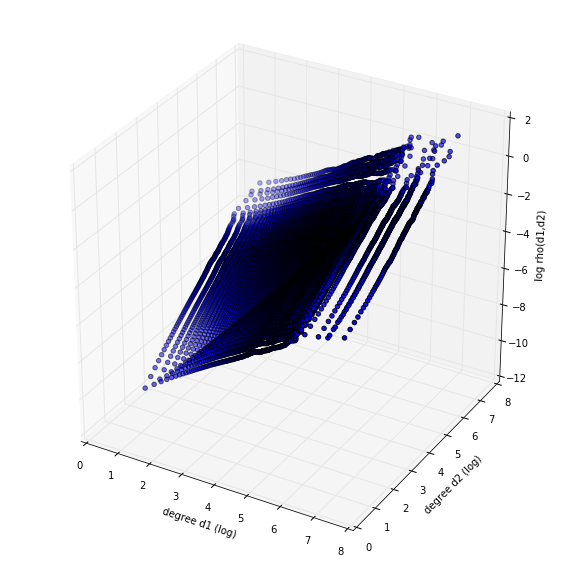

In [14]:
degree_values = sorted(set(G.degree().values()))
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
xs = []
ys = []
zs = []
for d1 in degree_values:
    for d2 in degree_values:
        if cum_dd[d1] and cum_dd[d2]:
            xs.append(np.log(d1))
            ys.append(np.log(d2))
            zs.append(np.log(cum_X[(d1,d2)] / float(cum_dd[d1] * cum_dd[d2])))

import pylab
pylab.rcParams['figure.figsize'] = 10, 10
ax.scatter(xs, ys, zs)
ax.set_xlabel('degree d1 (log)')
ax.set_ylabel('degree d2 (log)')
ax.set_zlabel('log rho(d1,d2)')
plt.show()

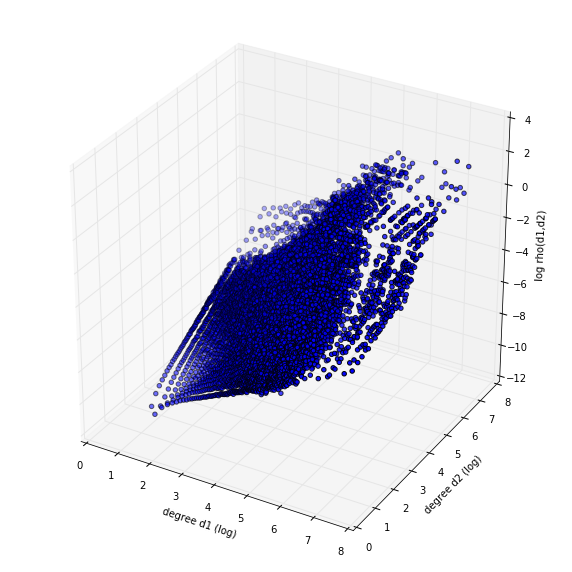

In [20]:
degree_values = sorted(set(G.degree().values()))
dd = Counter(G.degree().values())
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
xs = []
ys = []
zs = []
for d1 in degree_values:
    for d2 in degree_values:
        if dd[d1] and dd[d2]:
            xs.append(np.log(d1))
            ys.append(np.log(d2))
            zs.append(np.log(X[(d1,d2)] / float(dd[d1] * dd[d2])))

import pylab
pylab.rcParams['figure.figsize'] = 10, 10
ax.scatter(xs, ys, zs)
ax.set_xlabel('degree d1 (log)')
ax.set_ylabel('degree d2 (log)')
ax.set_zlabel('log rho(d1,d2)')
plt.show()

#### Задача 3
Используя теоремы о поведении величин $X(d_1,d_2)$ и $\sharp(d)$ в модели Боллобаша-Риордана, аппроксимируйте полученный в предыдущей задаче результат подходящей функцией.

#### Решение
Порядок числа вершин степени $d$ в графе Боллобаша-Риордана равен $d^{-3}$

Порядок величины $\tilde{\sharp}(d)$ равен $d^{-2}$

Порядок величины $X(d_1,d_2)$ в графе Боллобаша-Риордана равен $d_1^{-2}d_2^{-2}$

Порядок величины $\tilde{X}(d_1,d_2)$ равен $d_1^{-1}d_2^{-1}$ 

Оценка для $\tilde{\rho}(d_1,d_2)=\frac{\tilde{X}(d_1,d_2)}{\tilde{\sharp}(d_1)\tilde{\sharp}(d_2)}$ имеет вид $\Theta(d_1d_2)$. Поэтому будем аппроксимировать ее функцией $$f(d_1,d_2,c)=c\cdot d_1\cdot d_2.$$


In [12]:
def f(x, c):
    d1 = x[:, 0]
    d2 = x[:, 1]
    return float(c) * d1 * d2

from scipy.optimize import curve_fit
datax = np.array([
        [d1, d2]
        for (d1, d2) in cum_X.keys()
        if cum_dd[d1] and cum_dd[d2]
])
dataz = np.array([
        cum_X[(d1,d2)] / float(cum_dd[d1] * cum_dd[d2])
        for (d1, d2) in datax
])
curve_fit(f, datax, dataz)

(array([  3.88846627e-06]), array([[  3.18581825e-17]]))

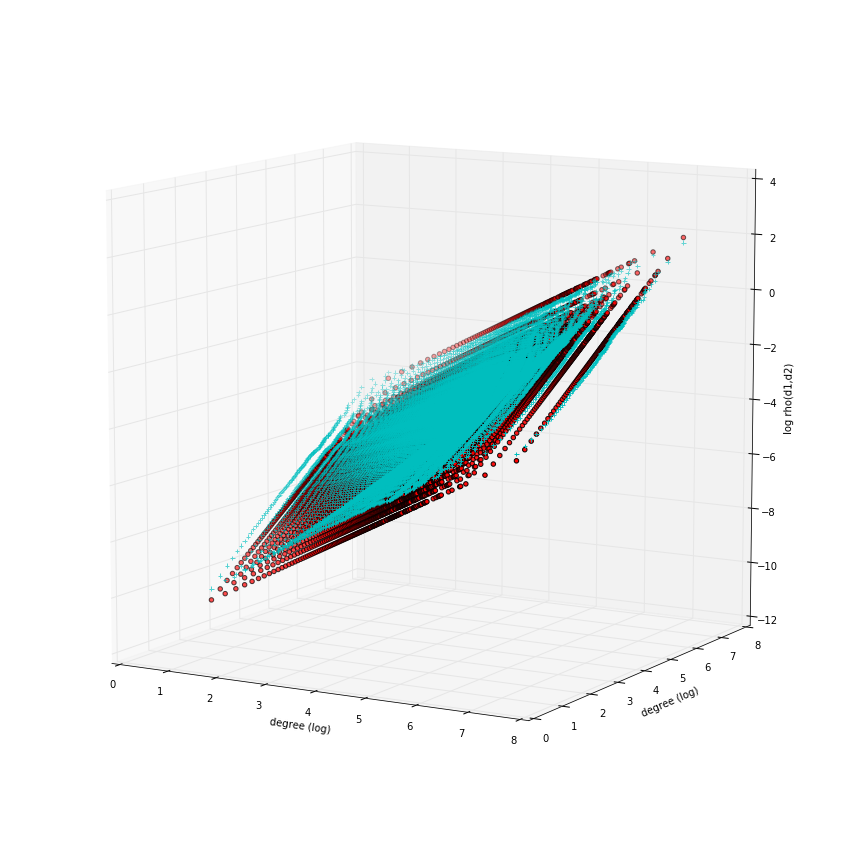

In [17]:
opt = 3.88846627e-06
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
xs = []
ys = []
zs = []
zs_est = []
for d1 in degree_values:
    for d2 in degree_values:
        if cum_dd[d1] and cum_dd[d2]:
            xs.append(np.log(d1))
            ys.append(np.log(d2))
            zs.append(np.log(cum_X[(d1,d2)]/ float(cum_dd[d1] * cum_dd[d2])))
            zs_est.append(np.log(opt * (d1  * d2 )))
ax.scatter(xs, ys, zs, c='c', marker='+')
ax.scatter(xs, ys, zs_est, c='r')
ax.set_xlabel('degree (log)')
ax.set_ylabel('degree (log)')
ax.set_zlabel('log rho(d1,d2)')
ax.view_init(elev=10., azim=300)
plt.show()